In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.rcParams['animation.embed_limit'] = 2**128

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Potential functions
def force_goal(x, y, goal):
    goal_x, goal_y, k_goal = goal
    Fx_goal, Fy_goal = k_goal * (goal_x - x), k_goal *(goal_y - y)
    return Fx_goal, Fy_goal

def force_obstacle(x, y, obstacle):
    (obs_x, obs_y, k_obs) = obstacle
    dist_x, dist_y = x - obs_x, y - obs_y
    dist_obs = np.hypot(dist_x, dist_y)
    Fx_obs = (dist_x / dist_obs) * k_obs / dist_obs ** 3
    Fy_obs = (dist_y / dist_obs) * k_obs / dist_obs ** 3

    return Fx_obs, Fy_obs

def total_force(x, y, goal, obstacles):
    Fx, Fy = force_goal(x, y, goal)

    for obs in obstacles:
        Fo_x, Fo_y = force_obstacle(x, y, obs)
        Fx += Fo_x
        Fy += Fo_y
    return Fx, Fy

def plot_vector_field(ax=plt, fmax = .7):
    X, Y = np.meshgrid(np.arange(-10, 10, .3), np.arange(-10, 10, .3))

    # Vector field of the forces
    Fx, Fy = total_force(X, Y, goal, obstacles)

    # For visualization
    F_m = np.hypot(Fx, Fy)
    Fx[F_m > fmax], Fy[F_m > fmax] = None, None
    # Plot
    # quiver(X, Y, Fx, Fy,  F_m, color='0.4', scale=None)
    ax.quiver(X, Y, Fx, Fy, color='0.4')

def simulate(q, goal, obstacles, num_steps=200, delta_time=1.9):
    trajectory = []
    for i in range(num_steps):
        force = total_force(q[0], q[1], goal, obstacles)
        # Robot velocity follows the force vector
        vel = np.array(force)
        # Integrate
        q += vel * delta_time
        trajectory.append(np.copy(q))

    
    return np.array(trajectory)

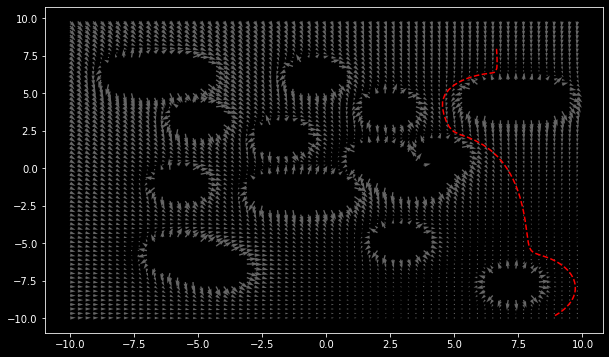

In [4]:
goal = [7.1, -8.6, 0.02]

obstacles = [[-0.525, 6.3, 0.7],
             [2.425, 4.075, 0.7],
             [-5.125, 3.425, 0.7],
             [-1.775, 2.1, 0.7],
             [4.4, 0.875, 0.7],
             [-5.8, -0.975, 0.7],
             [2.825, -4.85, 0.7],
             [7.275, -7.75, 0.7],
             [-7.7, 6.4, 0.7],
             [-6.7, 6.4, 0.7],
             [-5.7, 6.4, 0.7],
             [6.425, 4.725, 0.7],
             [7.425, 4.725, 0.7],
             [8.425, 4.725, 0.7],
             [-2.025, -1.5, 0.7],
             [-1.025, -1.5, 0.7],
             [0.025, -1.5, 0.7],
             [1.95895556, 0.64278734, 0.7],
             [2.725, -0.00000027, 0.7],
             [3.49104444, -0.64278788, 0.7],
             [-6.0160254, -5.7, 0.7],
             [-5.15, -6.2, 0.7],
             [-4.2839746, -6.7, 0.7],
              ]

q = np.array((6.625, 8.55))

trajectory = simulate(q, goal, obstacles)
plot(trajectory[:,0], trajectory[:,1], 'r--')
plot_vector_field()

In [5]:
%pylab inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Populating the interactive namespace from numpy and matplotlib


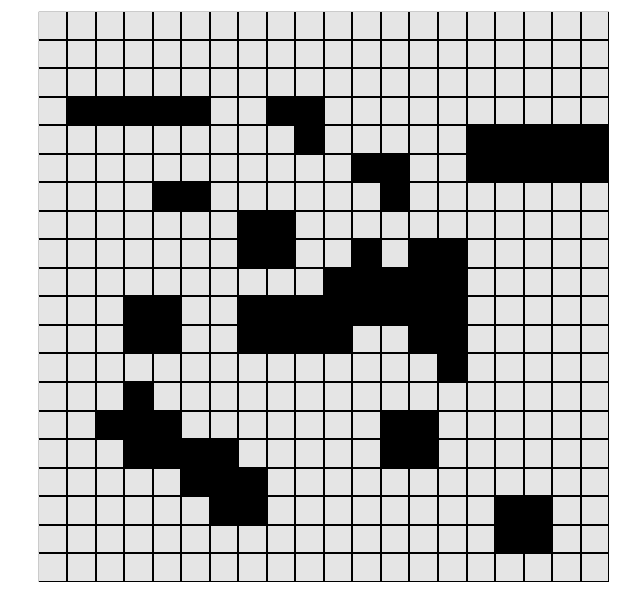

In [6]:
m, n = 20, 20  # number of rows and columns respectively.
# Create a matrix to represent the cells of the grid
grid_cells = np.zeros((m, n))

        #1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20
grid = [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#1
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],#2
        [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0],#3
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#4
        [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],#5
        [0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],#6
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#7
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],#8
        [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0],#9
        [0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],#10
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],#11
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],#12
        [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#13
        [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],#14
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1],#15
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1],#16
        [0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#17
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#18
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#19
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],#20
        ]

# Plot the grid
def draw_grid():
    fig, ax = plt.subplots()
    cmap = matplotlib.colors.ListedColormap(['0.9', 'black']) # Colors (0.9 is the almost white in gray scale)
    ax.imshow(grid, cmap=cmap, origin='lower')
    ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
    ax.set_xticks(np.arange(-0.5, n, 1));
    ax.set_yticks(np.arange(-0.5, m, 1));
    fig.set_size_inches(18.5, 10.5)

draw_grid()

Number of nodes in a full grid (n*m):  400
Number of nodes after removing obstacles:  325


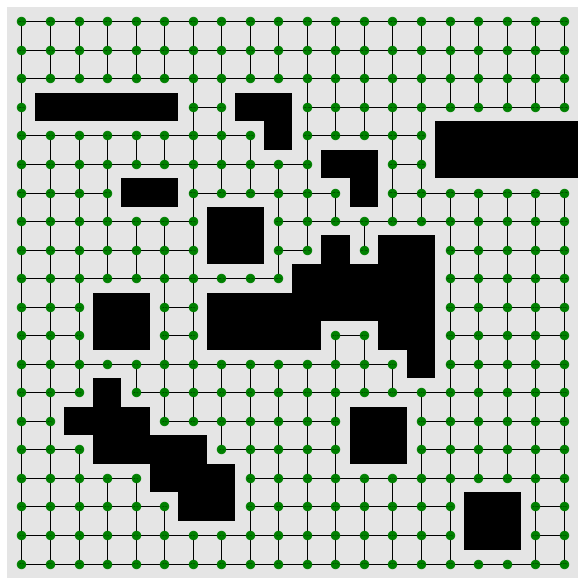

In [11]:
import networkx as nx
# This function automatically creates the graph in a grid.
G = nx.grid_2d_graph(m, n) 
print("Number of nodes in a full grid (n*m): ",len(G.nodes()))
# Delete nodes with obstacles
for i in range(m):
    for j in range(n):
        # if the node is an obstacle
        if grid[i][j] == 1:  
            G.remove_node((i,j))

print("Number of nodes after removing obstacles: ",len(G.nodes()))

draw_grid()
# Position of the nodes
pos = {node:(node[1], node[0]) for node in G.nodes()}  # by making (x,y) = (j, i), where i and j iterate over the columns and the rows respectively.
nx.draw(G, pos, font_size=2, with_labels=True, node_size=70, node_color="g")

[(18, 17), (17, 17), (16, 17), (16, 16), (16, 15), (16, 14), (15, 14), (14, 14), (13, 14), (12, 14), (12, 15), (11, 15), (10, 15), (9, 15), (8, 15), (7, 15), (6, 15), (5, 15), (4, 15), (3, 15), (3, 16), (3, 17), (3, 18), (2, 18), (1, 18)]


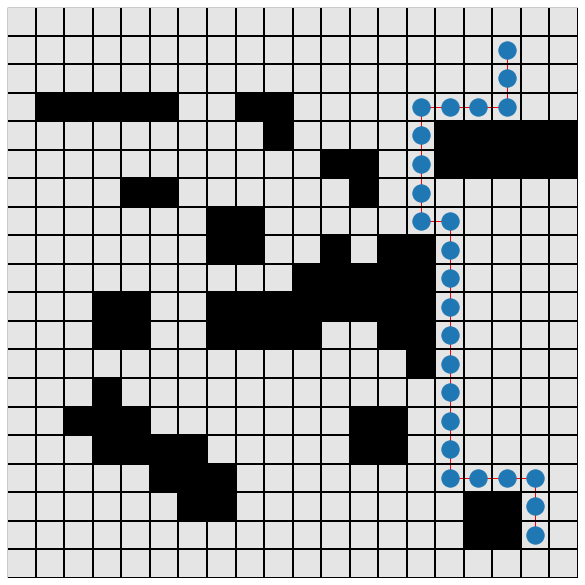

In [12]:
start_node =  (18, 17)
end_node = (1, 18)
bfs_tree = nx.bfs_tree(G, source=start_node)

# Pick the last element and iterate through its predecessors
path = [end_node]   # A path in a graph is a set of connected nodes
current = end_node

# iterate through its predecessors until finding source node
while current != start_node:
    # Predecesors of the current node        
    for pre in bfs_tree.predecessors(current):
        current = pre
    # add the predecessor to the path
    path.append(pre)
        
# The current path starts in the goal node and ends at the start node. So we invert it
path = path[::-1]

# Correct path
print(path)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos,edge_color='r')

[(18, 17), (17, 17), (16, 17), (16, 16), (16, 15), (16, 14), (15, 14), (14, 14), (13, 14), (12, 14), (12, 15), (11, 15), (10, 15), (9, 15), (8, 15), (7, 15), (6, 15), (5, 15), (4, 15), (3, 15), (3, 16), (3, 17), (3, 18), (2, 18), (1, 18)]


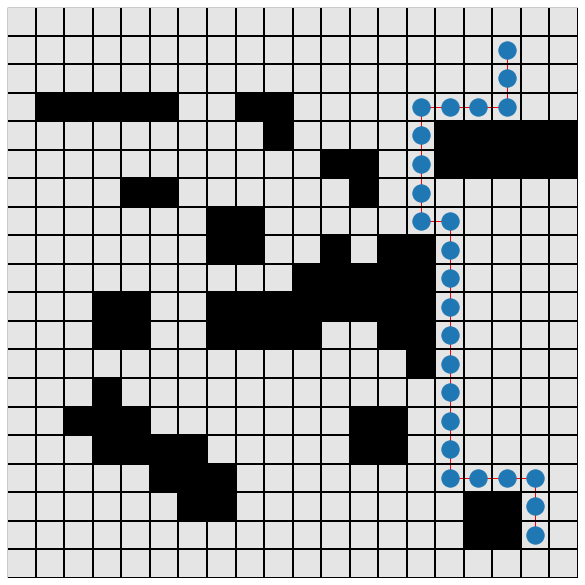

In [13]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

start_node =  (18, 17)
end_node = (1, 18)

path = nx.astar_path(G, start_node, end_node, dist)
print(path)

# Edges of the path
E = [(path[i], path[i+1])for i in range(len(path)-1)]

draw_grid()
nx.draw_networkx_nodes(path, pos)
nx.draw_networkx_edges(G, edgelist=E, pos=pos,edge_color='r')